# Introduction

Of all the applications of machine-learning, diagnosing any serious disease using a black box is always going to be a hard sell. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the absence of treatment, people are going to want to know why.

In this machine learning project, we used dataset that gives a number of variables along with a target condition of having or not having heart disease.  


# Problem Question

Can we predict the patient have or not heart disease with clinical parameters ?


We have collected our dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) 
In addition, we will analyze for this dataset. We will use a wide range of tools for this part. If there's value in there, we'il do it there. Finally, machine learning algorithms are estimated.

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Cause of Heart Disease

Excess weight, especially around the stomach area, increases a woman's risk of developing cardiovascular disease and lack of physical activity makes it worse.

Diabetes causes damage to blood vessels so diabetes is a major factor in developing cardiovascular disease.

Unhealthy foods, lack of exercise, lead to heart disease. So can high blood pressure, infections, and birth defects.
Smoking is one of the biggest causes of cardiovascular disease.

Just a few cigarettes a day can damage the blood vessels and reduce the amount of oxygen available in our blood.
But other things might surprise you.

# Loading the data

In [2]:

read_file = pd.read_excel ('heart.xls')
read_file.to_csv ('heart.csv', index = None, header=True)
#Load breast cancer dataset

df = pd.read_csv('heart.csv')
#print first 10 rows)
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean :


1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced 

   -> Value 0: typical angina:chest pain related decrease blood supply to
   the heart
   -> Value 1: atypical angina:chest pain not related to heart
   -> Value 2: non-anginal pain: typically esophageal spasms (non heart 
    related
   -> Value 3:asymptomatic: chest pain not showing signs of disease
                                 

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)anything above 130-140 is typically cause for concern

5.chol: The person's cholesterol measurement in mg/dl
         
    -> serum = LDL + HDL + .2 * triglycerides
    -> above 200 is cause for concern

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
       '>126' mg/dL signals diabetes

7.restecg: Resting electrocardiographic measurement

    -> 0 = normal (Nothing to note)
    -> 1 = having ST-T wave abnormality
         - can range from mild symptoms to severe problems
         - signals non-normal heart beat
    -> 2 = showing probable or definite left ventricular hypertrophy by
        Estes' criteria

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)
    
    -> colored vessel means the doctor can see the blood passing through
    -> the more blood movement the better (no clots)


13.thal: A blood disorder called thalassemia 
    -> 1,3 = normal
    -> 6 = fixed defect:used to be defect but ok now
    -> 7 = reversable defect:no proper blood movement when excercising 

14.target: Heart disease (0 = no, 1 = yes) = the predicted attribute


# 1. Exploratory Data Analysis (EDA)


The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

What question(s) are you trying to solve?

What kind of data do we have and how do we treat different types?
What's missing from the data and how do you deal with it?
Where are the outliers and why should you care about them?
How can you add, change or remove features to get more out of your data?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%. As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation. These; age, trestbps, chol, thalach

In [5]:
import pandas_profiling
x=pandas_profiling.ProfileReport(df)
x

Here I use Pandas profiling, it reduce lots of our work. Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc

# Data Visualisation 

A quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis).

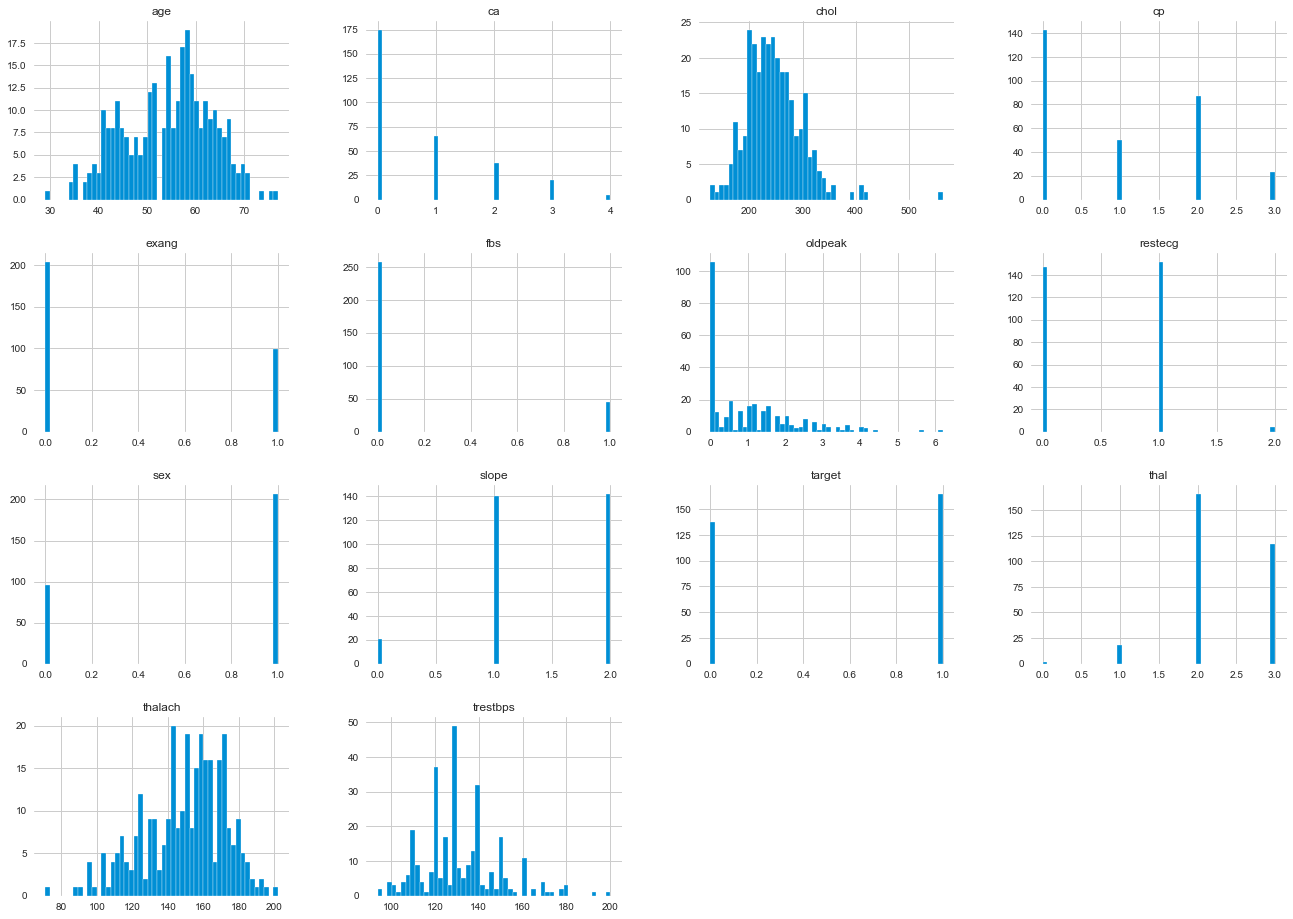

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Checking for messing values
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Looks like the perfect dataset!!! No null values

# The target 

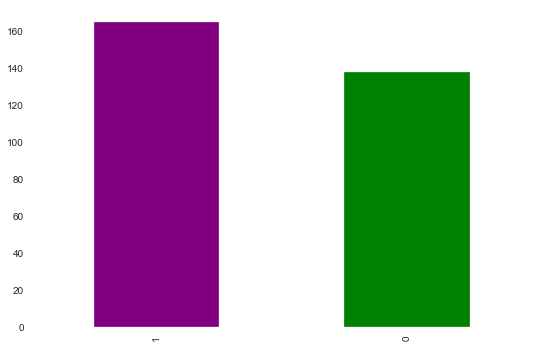

In [8]:
df.target.value_counts().plot(kind="bar", color=["purple", "green"])

We have 165 person with heart disease and 138person without heart disease, so our problem is balanced.

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('***************************************************************')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)


***************************************************************
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
***************************************************************
sex : [1 0]
***************************************************************
cp : [3 2 1 0]
***************************************************************
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
***************************************************************
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 28

In [10]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

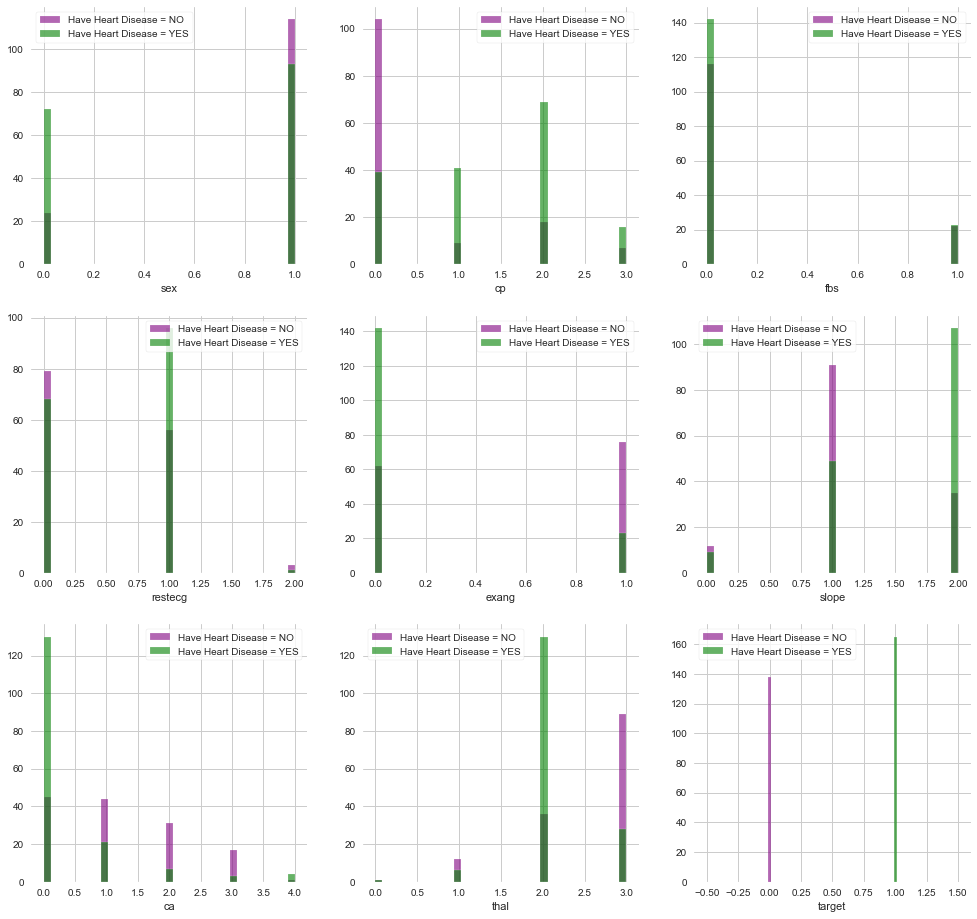

In [11]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='purple', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='green', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Remarks

------> Sex

The rate of heart disease in females have more in comprission of male.
Women are 4 times more likely to die from heart disease than breast cancer


----> cp {Chest Pain} 

People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.



----> fbs

The 51.2% person having the fasting blood sugar rate over 120 mg/dl and 55% person having the fasting blood sugar rate below 120 mg/dl is affected by heart disease.

------> restecg {resting electrocardiographic results

People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

----> exang {exercise induced angina} 

People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

----> slope {the slope of the peak exercise ST segment} 

People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).


-----> ca {number of major vessels (0-3) colored by flourosopy} 

the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.


-----> thal {thalium stress result} 

People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

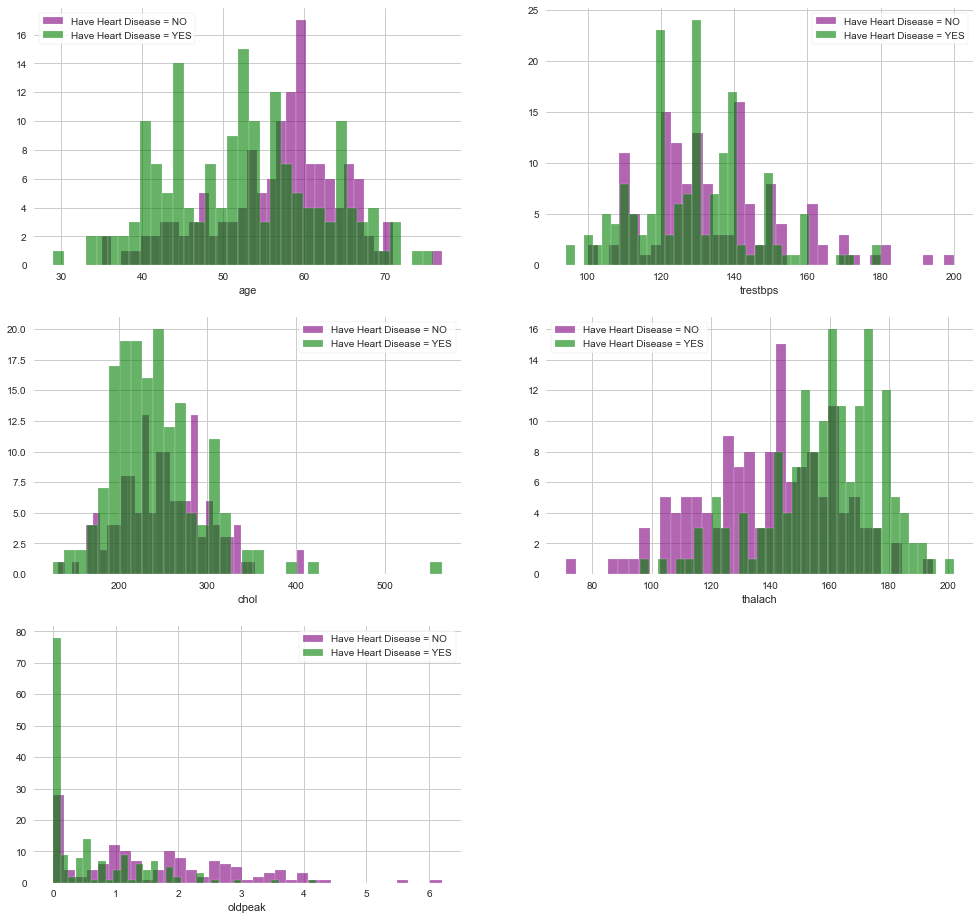

In [12]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='purple', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='green', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column )

-----> trestbps 

resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

-----> chol {serum cholestoral in mg/dl}

above 200 is cause for concern


---->thalach {maximum heart rate achieved} 

People how acheived a maximum more than 140 are more likely to have heart disease.


-----> oldpeak 

ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

# Correlation Matrix

(14.5, -0.5)

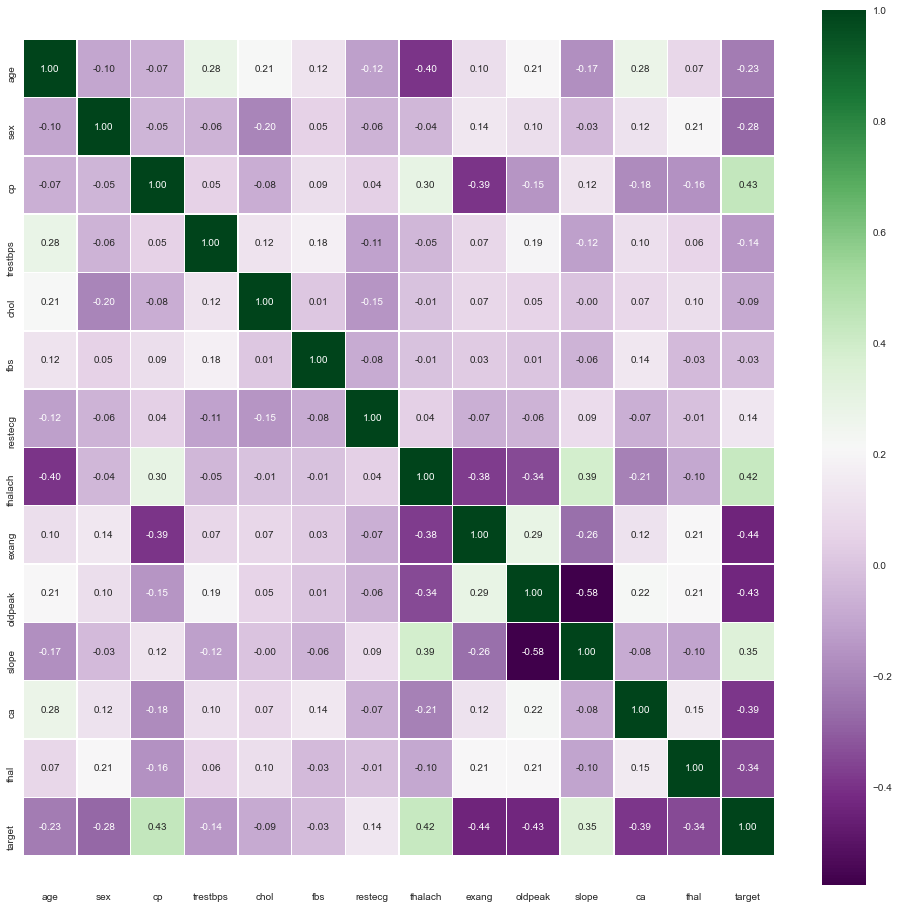

In [13]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PRGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

we can see a small negative and positive correlation between all attributes 
coefficients close to zero mean that there is no linear correlation
and :
   . not necessary to create new attribues as combination between some of them 
   . Also we don't have redondant attributes to getting rip manually or by using regularization
 

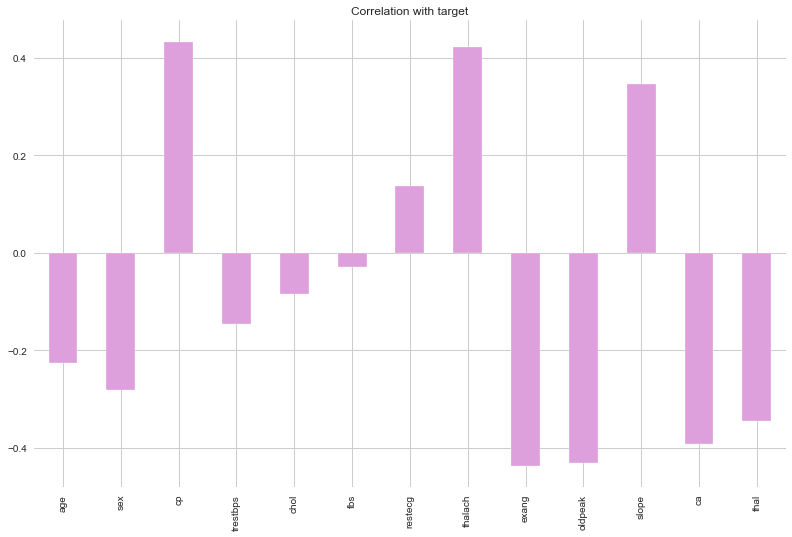

In [14]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8),color="plum", 
                                                   title="Correlation with target")


"fbs" and "chol" are the lowest correlated with the target variable.



# 3. Data Processing


After exploring the dataset, we observed that we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.

First, w'll use the "get_dummies" method to create dummy columns for categorical variables.

In [15]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [16]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [17]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


Machine learning Algorithmes perfom badly on data with different scales , so we use Features scaling .
 

We normalize the continuous variables only, without the dummy variables . and we use the min-max scaler to give those continuous variables the same minimum of zero, max of one, range of 1

In [18]:
from sklearn.preprocessing import MinMaxScaler

MinMax_sc = MinMaxScaler (feature_range=(0,1))
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = MinMax_sc.fit_transform(dataset[col_to_scale])


In [19]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.71,0.48,0.24,0.60,0.37,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.17,0.34,0.28,0.89,0.56,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.25,0.34,0.18,0.77,0.23,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.56,0.25,0.25,0.82,0.13,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.58,0.25,0.52,0.70,0.10,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Feature selection


A better option is to split your data into two sets: the training set and the test set.
you train your model using the training set, and you test it using
the test set. The error rate on new cases is called the generalization error , and by evaluating your model on the test set, you get an estimation of this error. 

This value tells you how well your model will perform on instances it has
never seen before

Xstant=X-mean(X)/st.dev(X)

Xnorm=X-min(X)/max(X)-min(X)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("\nTrain Result:\n================================================\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("\nTest Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Spliting the 70% of the dataset into train_data and 30% of the dataset into test_data

In [21]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
X_test.index

Int64Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45,
            175, 118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283,
            254,  73, 231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,
             57,  92,  77, 137, 116,   7, 251, 281,  78, 292, 232, 219, 255,
             63,  82, 236, 204, 249, 104, 300, 193, 184, 132, 202, 196,  75,
            176,  59,  93,   6, 177,  30,  22, 258,  56, 242, 114, 287, 282,
            197, 158, 164, 244,  84,  66, 113, 167, 250,  19, 143,  79, 144],
           dtype='int64')

# 4. Applying machine learning algorithms

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We have used a number of machine learning algorithms,these are

1.logistic regression

The meaning of the term regression is very simple: any process that attempts to find relationships between variables is called regression. Logistic regression is regression because it finds relationships between variables. It is logistic because it uses logistic function as a link function.

2.support vector machine (SVM)

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. So you're working on a text classification problem.

3.k nearest neighborhood (kNN)

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition


4.RandomForestClassifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees


5.DecisionTreeClassifier algorithms.

A decision tree classifier is a tree in which internal nodes are labeled by features. The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi


# 4. 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Our task inder the hood of this model is to find the best Parameters (Thetas ) that give us the least error in predicting the output. We call this error a Cost or Loss Function and apparently our goal is to minimize it in order to get the best predicted output .

The solver = 'liblinear' uses a coordinate descent (CD) algorithm that solves optimization problems by successively performing approximate minimization of error along coordinate directions or coordinate hyperplanes 

For small datasets as we have , ‘liblinear’ is a good choice .


In [24]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 87.74%
_______________________________________________
Classification Report:	Precision Score: 88.03%
			Recall Score: 89.57%
			F1 score: 88.79%
_______________________________________________
Confusion Matrix: 
 [[ 83  14]
 [ 12 103]]


Test Result:
Accuracy Score: 81.32%
_______________________________________________
Classification Report:	Precision Score: 82.35%
			Recall Score: 84.00%
			F1 score: 83.17%
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 8 42]]



In [25]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.74,81.32


# 4. 2. K-nearest neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 89.62%
_______________________________________________
Classification Report:	Precision Score: 90.43%
			Recall Score: 90.43%
			F1 score: 90.43%
_______________________________________________
Confusion Matrix: 
 [[ 86  11]
 [ 11 104]]


Test Result:
Accuracy Score: 81.32%
_______________________________________________
Classification Report:	Precision Score: 82.35%
			Recall Score: 84.00%
			F1 score: 83.17%
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 8 42]]



In [27]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.74,81.32
1,K-nearest neighbors,89.62,81.32


# 4. 3. Support Vector machine

The main objective of SVM is to find the best decision boundary splitting the instances .

we can resolve this problem by findding the largest margin as mach as possible ( the widest street ).

In [28]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 89.15%
_______________________________________________
Classification Report:	Precision Score: 88.98%
			Recall Score: 91.30%
			F1 score: 90.13%
_______________________________________________
Confusion Matrix: 
 [[ 84  13]
 [ 10 105]]


Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 84.91%
			Recall Score: 90.00%
			F1 score: 87.38%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



In [30]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.74,81.32
1,K-nearest neighbors,89.62,81.32
2,Support Vector Machine,89.15,85.71


# 4. 4. Decision Tree Classifier

This method very useful when we are a lot of attributes and we have the case 
our objective is to find the best attribute which split our dataset and use it as the root of tree .


In [31]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]


Test Result:
Accuracy Score: 78.02%
_______________________________________________
Classification Report:	Precision Score: 84.09%
			Recall Score: 74.00%
			F1 score: 78.72%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



In [32]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.74,81.32
1,K-nearest neighbors,89.62,81.32
2,Support Vector Machine,89.15,85.71
3,Decision Tree Classifier,100.00,78.02


# 4. 5. Random Forest

The Random Forest algorithm introduces extra randomness when growing trees
instead of searching for the very best feature when splitting a node , it
searches for the best feature among a random subset of features. 

This results in agreater tree diversity, which  trades a higher bias for a lower variance, generally yielding an overall better mode

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)



Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]


Test Result:
Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



In [34]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.74,81.32
1,K-nearest neighbors,89.62,81.32
2,Support Vector Machine,89.15,85.71
3,Decision Tree Classifier,100.00,78.02
4,Random Forest Classifier,100.00,82.42


# 5. Applying Machine Learning Algorithms Using Hyperparameter Tuning


A hyperparameter is a parameter whose value is used to control the learning process

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. 

# 5. 1. Logistic Regression Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-0...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [36]:
 grid_search_cv.best_estimator_

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
log_reg = LogisticRegression(C=0.08858667904100823, 
                             solver='liblinear')

log_reg.fit(X_train, y_train)

print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 87.18%
			Recall Score: 88.70%
			F1 score: 87.93%
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]


Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



In [38]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.79,83.52


Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class If the estimated probability is greater than 50%, then the model predicts that the instance belongs to positive class (labeled “1”), or else it predicts that it belongs to the negative class, labeled “0”


In [39]:
logisticproba = pd.DataFrame(log_reg.predict_proba(X_test))
logisticproba.index=X_test.index
logisticproba.head(n=10)


,0,1
179,0.90,0.10
228,0.55,0.45
111,0.44,0.56
246,0.90,0.10
60,0.19,0.81
9,0.11,0.89
119,0.52,0.48
223,0.87,0.13
268,0.86,0.14
33,0.43,0.57


# 5. 2. K-nearest neighbors Hyperparameter Tuning

In [40]:
train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 85.71%


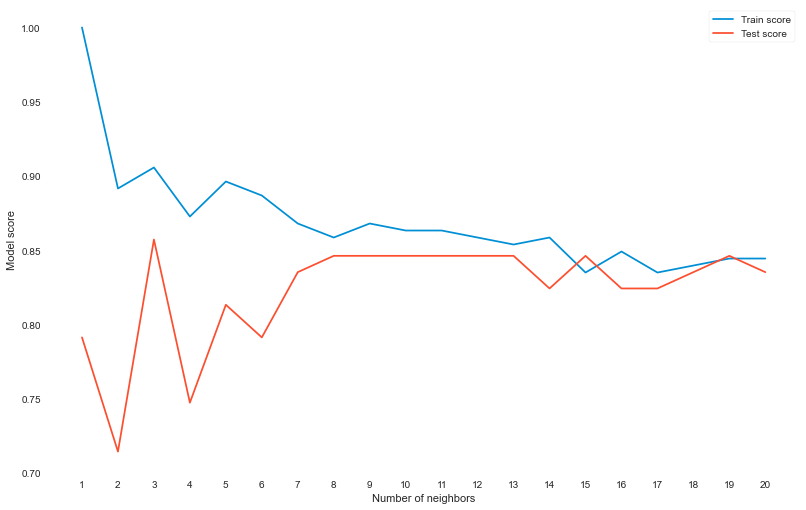

In [41]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)



Train Result:

Accuracy Score: 84.43%
_______________________________________________
Classification Report:	Precision Score: 83.61%
			Recall Score: 88.70%
			F1 score: 86.08%
_______________________________________________
Confusion Matrix: 
 [[ 77  20]
 [ 13 102]]


Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



In [43]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.79,83.52
1,Tuned K-nearest neighbors,84.43,84.62


Let's estimate the probability that an instance belongs to a particular class with KNN method

In [44]:
KNNproba = pd.DataFrame(log_reg.predict_proba(X_test))
KNNproba.index=X_test.index
KNNproba.head(n=10)


,0,1
179,0.90,0.10
228,0.55,0.45
111,0.44,0.56
246,0.90,0.10
60,0.19,0.81
9,0.11,0.89
119,0.52,0.48
223,0.87,0.13
268,0.86,0.14
33,0.43,0.57


# 5. 3. Support Vector Machine Hyperparameter Tuning

The objective is to find a good balance between keeping the street as large as possible and limiting the
 instances that end up in the middle of the street or even on the wrong side
 
we  can control this balance using the C hyperparameter: 
a smaller C value leads to a wider street  

In [45]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_grid = GridSearchCV(svm_model, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

the previous model of SVM based on 'rbf' kernel which use the similarity founction to spliit the dataset

in this side we tunned the the best of the tree kernels

gamma = 1/2*var is a parametre of kernel 

C id the regularization parametreto , we tunned the best value to avoid overfitting

In [46]:
svm_grid.best_estimator_

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
svm_model = SVC(C=0.5, gamma=0.001, kernel='linear')
svm_model.fit(X_train, y_train)

print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 88.21%
_______________________________________________
Classification Report:	Precision Score: 87.50%
			Recall Score: 91.30%
			F1 score: 89.36%
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 10 105]]


Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 84.91%
			Recall Score: 90.00%
			F1 score: 87.38%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



In [48]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.79,83.52
1,Tuned K-nearest neighbors,84.43,84.62
2,Tuned Support Vector Machine,88.21,85.71


SVM estimate just the class of a new instance and not to probabily

In [49]:
SVMpredict = pd.DataFrame(svm_model.predict(X_test))
SVMpredict.index=X_test.index
SVMpredict.head(n=10)


,0
179,0
228,1
111,1
246,0
60,1
9,1
119,0
223,0
268,0
33,1


# 5. 4. Decision Tree Classifier Hyperparameter Tuning

In [50]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   40.3s finished
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid=True, n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_d

In [51]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

In [52]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 85.85%
_______________________________________________
Classification Report:	Precision Score: 85.12%
			Recall Score: 89.57%
			F1 score: 87.29%
_______________________________________________
Confusion Matrix: 
 [[ 79  18]
 [ 12 103]]


Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 87.23%
			Recall Score: 82.00%
			F1 score: 84.54%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 9 41]]



In [53]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.79,83.52
1,Tuned K-nearest neighbors,84.43,84.62
2,Tuned Support Vector Machine,88.21,85.71
3,Tuned Decision Tree Classifier,85.85,83.52


In [54]:
treeproba = pd.DataFrame(tree.predict_proba(X_test))
treeproba.index=X_test.index
treeproba.head(n=10)


,0,1
179,0.94,0.06
228,0.33,0.67
111,0.79,0.21
246,0.94,0.06
60,0.30,0.70
9,0.06,0.94
119,0.06,0.94
223,0.94,0.06
268,0.93,0.07
33,0.30,0.70


# 5. 5. Random Forest Classifier Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [56]:
rf_random.best_estimator_


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [57]:
rand_forest = RandomForestClassifier(bootstrap=True,
                                     max_depth=70, 
                                     max_features='auto', 
                                     min_samples_leaf=4, 
                                     min_samples_split=10,
                                     n_estimators=400)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 91.51%
_______________________________________________
Classification Report:	Precision Score: 91.45%
			Recall Score: 93.04%
			F1 score: 92.24%
_______________________________________________
Confusion Matrix: 
 [[ 87  10]
 [  8 107]]


Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



In [59]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.79,83.52
1,Tuned K-nearest neighbors,84.43,84.62
2,Tuned Support Vector Machine,88.21,85.71
3,Tuned Decision Tree Classifier,85.85,83.52
4,Tuned Random Forest Classifier,91.51,84.62


In [60]:
forestproba = pd.DataFrame(rand_forest.predict_proba(X_test))
forestproba.index=X_test.index
forestproba.head(n=10)


,0,1
179,0.90,0.10
228,0.48,0.52
111,0.47,0.53
246,0.90,0.10
60,0.29,0.71
9,0.10,0.90
119,0.41,0.59
223,0.88,0.12
268,0.87,0.13
33,0.38,0.62


# Summary

We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used Plotly, seaborn and matplotlib to do the visualizations. During the data preprocessing part, we converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training machine learning models.Finaly we applied this algorithms using hyperparameter tuning